# Model properties

Fitting models is ineffective without evaluating their performance. Estimating performance by merely observing results can lead to misunderstandings. This page describes methods that provide detailed insights into your model, offering valuable information for its improvement.

In [13]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Confusion matrix

Is a way to learn properties of your classification model.

Suppose we have formed some classifier. We have the following groups of observations.

- *True positive*: observations that were positive in the sample and we correctly predicted them as positive. We will denote their number as $TP$;
- *True negative*: observations that were negative in the sample and we correcrly predicted then as negative. We will denote their number as $TN$;
- *False positve*: observations that were negative in the sample, but which we then mistakenly predicted to be positive. We will denote their number as $FP$;
- *False negative*: observations that were positive in the sample, but wich we then mistakenly predicted to be negative. We will denote their number as $FN$.

So, if you put the actual value on the rows and the predicted value on the columns, you will get a confusion matrix.


| | Predicted $N$ | Predicted $P$ |
|:---|:---:|:---:|
| Actual $N$ |$TN$|$FP$ |
| Actual $P$ |$FN$|$TP$|

Find out more in the [special page](model_properties/confusion_matrix.ipynb).

## Permutation importance

To estimate features importances of the arbitrary model you can use permutation importance algorithm. The idea is to randomly change some features of the input, and estimate a change of the model's quality measure - big change means that feature was important. For more details check ["Permutation feature importance"](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-feature-importance), page on sklearn.

---

The code in the following cell creates a small $X \rightarrow y$ relationship dataset, so that each next column has a greater impact on the result than the previous one.

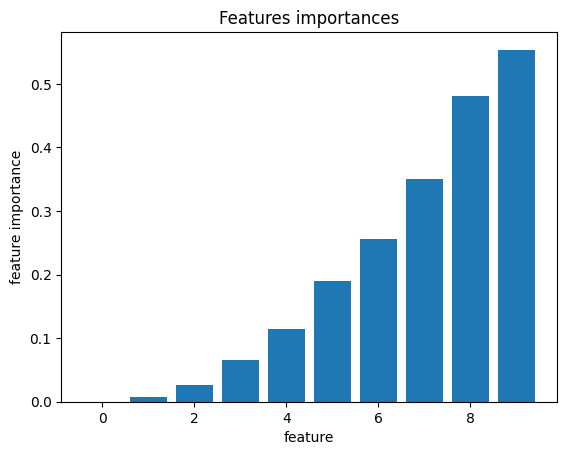

In [17]:
features_numer = 10
sample_size = 500

X = np.random.uniform(-5, 5, (sample_size, features_numer))
y = (X @ np.arange(features_numer))

model = sklearn.linear_model.LinearRegression().fit(X=X, y=y)

from sklearn.inspection import permutation_importance
importances = permutation_importance(
    estimator=model, X=X, y=y, scoring="r2"
)["importances_mean"]

plt.bar(range(importances.shape[0]), importances)
plt.xlabel("feature"), plt.ylabel("feature importance")
plt.title("Features importances")
plt.show()

As a result, other features have a greater impact on the outcome.